In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("movies.csv")

In [3]:
data.shape

(9742, 3)

In [4]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating = pd.read_csv("ratings.csv")

In [6]:
rating.shape

(100836, 4)

In [7]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
## let's merge the movies and ratings data to get a final dataframe
data_f = pd.merge(data, rating, on="movieId", how="inner")

In [9]:
data_f.shape

(100836, 6)

In [10]:
data_f.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [11]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [12]:
data_f = data_f.drop(["movieId", "userId", "timestamp"], axis=1)
data_f

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
...,...,...,...
100831,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0
100832,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5
100833,Flint (2017),Drama,3.5
100834,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5


In [13]:
dataf = pd.pivot_table(data_f, index=["title", "genres"], aggfunc="mean")
dataf

,,rating
title,genres,
'71 (2014),Action|Drama|Thriller|War,4.000000
'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
'Round Midnight (1986),Drama|Musical,3.500000
'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
'Til There Was You (1997),Drama|Romance,4.000000
...,...,...
eXistenZ (1999),Action|Sci-Fi|Thriller,3.863636
xXx (2002),Action|Crime|Thriller,2.770833
xXx: State of the Union (2005),Action|Crime|Thriller,2.000000


In [14]:
dataf.reset_index(level=["title", "genres"], inplace=True)
dataf.head()

,title,genres,rating
0,'71 (2014),Action|Drama|Thriller|War,4.0
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.0
2,'Round Midnight (1986),Drama|Musical,3.5
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0
4,'Til There Was You (1997),Drama|Romance,4.0


In [15]:
dataf.shape

(9724, 3)

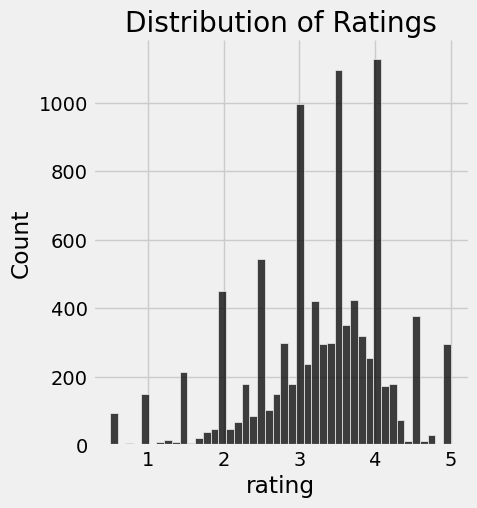

In [16]:
## Let's plot the distribution of ratings acrross movies
plt.rcParams["figure.figsize"] = (5,8)
plt.style.use("fivethirtyeight")
sns.displot(dataf["rating"], color="black")
plt.title("Distribution of Ratings")
plt.show()

In [17]:
def split(x):
    x = x.split(" ")[-1]
    x = x.replace("(", "")
    x = x.replace(")", "")
    return x

In [18]:
dataf["title"][0]

"'71 (2014)"

In [19]:
split(dataf["title"][0])

'2014'

In [20]:
type(split(dataf["title"][0]))

str

In [21]:
# let's extract the year of release from the title
dataf["year"] = dataf["title"].apply(lambda x: split(x))

In [22]:
dataf["year"].value_counts()

2002      311
2006      295
2001      294
2000      283
2009      282
         ... 
1919        1
Mirror      1
1915        1
5           1
1902        1
Name: year, Length: 120, dtype: int64

In [23]:
dataf["year"].unique()

array(['2014', '2004', '1986', '1997', '2015', '1989', '2009', '1987',
       '1981', '1979', '1994', '2016', '2006', '1999', '2011', '2008',
       '2000', '1996', '1961', '2003', '1965', '2002', '2007', '1957',
       '1971', '1976', '2013', '2010', '1960', '2005', '1992', '2001',
       '1972', '1988', '1984', '2012', '1998', '1916', '1954', '1968',
       '2017', '1977', '1985', '1995', '', '1991', '1935', '1959', '1933',
       '1982', '1953', '1964', '1958', '1963', '2018', '1948', '1951',
       '1949', '1993', '1990', '1938', '1962', '1924', '1975', '1966',
       '1936', '1980', '1970', '1974', '1950', '1930', '1955', '1940',
       '1983', '1973', '1956', '1945', '1929', '1969', '1978', '1939',
       '1944', '1934', '1937', '5', '1947', '1952', '1942', '1967',
       '1925', '1946', '1915', 'Mirror', '1932', '1926', '1920', '1927',
       '1931', '1928', '1941', '1943', 'Cosmos', '1919', '2006–2007', '2',
       '1923', 'Road', '1917', '1921', 'Baby', 'Moonlight', 'Animals',

In [24]:
my_df = dataf[dataf.year.isin(['Mirror', 'Cosmos', 'Baby', 'Moonlight', "2006–2007", '', '2', '5', 'Road', 'Animals', 'Paterson', 'One', 'Watson', 'OA' ])]
my_df

,title,genres,rating,year
100,3 dev adam (Three Giant Men) (1973),Action|Adventure|Sci-Fi,0.50,
149,96 Minutes (2011),Drama|Thriller,2.50,
633,Assembly (Ji jie hao) (2007),Action|Drama|War,4.50,
729,Babylon 5,Sci-Fi,2.25,5
1120,Black Mirror,(no genres listed),5.00,Mirror
1988,Cosmos,(no genres listed),4.50,Cosmos
2245,Dead Snow 2: Red vs. Dead (2014),Action|Comedy|Horror,4.00,
2268,Death Note: Desu nôto (2006–2007),(no genres listed),5.00,2006–2007
3256,From Dusk Till Dawn 2: Texas Blood Money (1999),Comedy|Crime|Horror,1.00,
3362,Generation Iron 2,(no genres listed),3.50,2


In [25]:
found_year = ["1973", "2011", "2007", "1993", "2011", "2015", "2014", "2006", "1999", "2017", "2011", "2015", "2012", "2008", "2017", "2016", "2016", "2016", "1998", "2018", "1995", "2007", "1979", "2016"]

In [26]:
len(my_df)

24

In [27]:
my_df.shape

(24, 4)

In [28]:
my_df.index

Int64Index([ 100,  149,  633,  729, 1120, 1988, 2245, 2268, 3256, 3362, 3679,
            4157, 4684, 4685, 5459, 5792, 6165, 6506, 6690, 6990, 7299, 8194,
            8402, 8572],
           dtype='int64')

In [29]:
dataf.loc[my_df.index, "year"]

100              
149              
633              
729             5
1120       Mirror
1988       Cosmos
2245             
2268    2006–2007
3256             
3362            2
3679             
4157         Road
4684             
4685             
5459         Baby
5792    Moonlight
6165      Animals
6506     Paterson
6690             
6990          One
7299             
8194             
8402       Watson
8572           OA
Name: year, dtype: object

In [30]:
dataf.loc[my_df.index, "year"] = found_year

In [31]:
dataf.loc[my_df.index, "year"]

100     1973
149     2011
633     2007
729     1993
1120    2011
1988    2015
2245    2014
2268    2006
3256    1999
3362    2017
3679    2011
4157    2015
4684    2012
4685    2008
5459    2017
5792    2016
6165    2016
6506    2016
6690    1998
6990    2018
7299    1995
8194    2007
8402    1979
8572    2016
Name: year, dtype: object

In [32]:
dataf["year"].unique()

array(['2014', '2004', '1986', '1997', '2015', '1989', '2009', '1987',
       '1981', '1979', '1994', '2016', '2006', '1999', '2011', '2008',
       '2000', '1996', '1961', '2003', '1965', '2002', '2007', '1957',
       '1971', '1976', '2013', '2010', '1960', '2005', '1992', '2001',
       '1972', '1988', '1984', '2012', '1998', '1916', '1954', '1968',
       '2017', '1977', '1985', '1995', '1973', '1991', '1935', '1959',
       '1933', '1982', '1953', '1964', '1958', '1963', '2018', '1948',
       '1951', '1949', '1993', '1990', '1938', '1962', '1924', '1975',
       '1966', '1936', '1980', '1970', '1974', '1950', '1930', '1955',
       '1940', '1983', '1956', '1945', '1929', '1969', '1978', '1939',
       '1944', '1934', '1937', '1947', '1952', '1942', '1967', '1925',
       '1946', '1915', '1932', '1926', '1920', '1927', '1931', '1928',
       '1941', '1943', '1919', '1923', '1917', '1921', '1922', '1908',
       '1903', '1902'], dtype=object)

In [33]:
dataf["year"] = dataf["year"].astype(int)

In [34]:
dataf["year"].unique()

array([2014, 2004, 1986, 1997, 2015, 1989, 2009, 1987, 1981, 1979, 1994,
       2016, 2006, 1999, 2011, 2008, 2000, 1996, 1961, 2003, 1965, 2002,
       2007, 1957, 1971, 1976, 2013, 2010, 1960, 2005, 1992, 2001, 1972,
       1988, 1984, 2012, 1998, 1916, 1954, 1968, 2017, 1977, 1985, 1995,
       1973, 1991, 1935, 1959, 1933, 1982, 1953, 1964, 1958, 1963, 2018,
       1948, 1951, 1949, 1993, 1990, 1938, 1962, 1924, 1975, 1966, 1936,
       1980, 1970, 1974, 1950, 1930, 1955, 1940, 1983, 1956, 1945, 1929,
       1969, 1978, 1939, 1944, 1934, 1937, 1947, 1952, 1942, 1967, 1925,
       1946, 1915, 1932, 1926, 1920, 1927, 1931, 1928, 1941, 1943, 1919,
       1923, 1917, 1921, 1922, 1908, 1903, 1902])

In [35]:
dataf.head()

,title,genres,rating,year
0,'71 (2014),Action|Drama|Thriller|War,4.0,2014
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.0,2004
2,'Round Midnight (1986),Drama|Musical,3.5,1986
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0,2004
4,'Til There Was You (1997),Drama|Romance,4.0,1997


In [36]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   9724 non-null   object 
 1   genres  9724 non-null   object 
 2   rating  9724 non-null   float64
 3   year    9724 non-null   int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 266.0+ KB


In [37]:
## let's check the first and last release year
print("First Release year :", dataf["year"].min())
print("Last Release year :", dataf["year"].max())

First Release year : 1902
Last Release year : 2018


In [38]:
dataf[["title", "rating"]][dataf["year"] == 2018].sort_values(by = "rating", 
                                                       ascending= False).head(30).reset_index(drop = True).style.background_gradient(cmap="Wistia")

,title,rating
0,Won't You Be My Neighbor? (2018),5.000000
1,Alpha (2018),4.500000
2,Tom Segura: Disgraceful (2018),4.500000
3,The Man Who Killed Don Quixote (2018),4.500000
4,Sorry to Bother You (2018),4.500000
5,Mamma Mia: Here We Go Again! (2018),4.500000
6,Death Wish (2018),4.000000
7,Tag (2018),4.000000
8,Game Night (2018),4.000000
9,"Love, Simon (2018)",4.000000


In [39]:
## let's check the number of Movies that got 5 star reviews and less than 1 star reviews



In [40]:
dataf["title"][dataf["rating"] == 5].count()

296

In [41]:
print("The number of movies that received 5 star Reviews :", dataf["title"][dataf["rating"] == 5].count())
print("The percentage of movies that received 5 star reviews : {0:.2f}%".format(dataf["title"][dataf["rating"] == 5].count()/(len(dataf))) )
print("\n")
print("The number of movies that received less or equal 1 star Reviews :", dataf["title"][dataf["rating"] <= 1].count())
print("The percentage of movies that received less than or equal 1 star reviews : {0:.2f}%".format(dataf["title"][dataf["rating"] <= 1].count()/(len(dataf))) )


The number of movies that received 5 star Reviews : 296
The percentage of movies that received 5 star reviews : 0.03%


The number of movies that received less or equal 1 star Reviews : 258
The percentage of movies that received less than or equal 1 star reviews : 0.03%


In [42]:
dataf["genres"].str.split("|").explode()

0         Action
0          Drama
0       Thriller
0            War
1         Action
          ...   
9721    Thriller
9722      Comedy
9722     Western
9723      Comedy
9723     Musical
Name: genres, Length: 22046, dtype: object

In [43]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [44]:
# let's create an intercative function to get the list of best movies from Each genre

@interact(year=(dataf["year"].min(), dataf["year"].max()))
def genre(Genre = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Film-Noir", "Horror", "IMAX", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War"], year = 1902):
    x = dataf["genres"].str.split("|")
    d = dataf.drop(["genres"], axis=1)
    x = pd.concat([d,x], axis=1)
    x = x.explode("genres")
    x = x[["title", "rating"]][(x["genres"] == Genre) & (x["year"]>=year)].sort_values(by = "rating", ascending=False).reset_index(drop=True).head(15).style.background_gradient(cmap="Wistia")
   
    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [46]:
from mlxtend.preprocessing import TransactionEncoder

In [47]:
# let's split all the genres into transactions
genres = dataf["genres"].str.split()

In [48]:
genres

0                          [Action, Drama, Thriller, War]
1       [Action, Adventure, Comedy, Documentary, Fantasy]
2                                        [Drama, Musical]
3                      [Drama, Horror, Mystery, Thriller]
4                                        [Drama, Romance]
                              ...                        
9719                           [Action, Sci-Fi, Thriller]
9720                            [Action, Crime, Thriller]
9721                            [Action, Crime, Thriller]
9722                                    [Comedy, Western]
9723                                    [Comedy, Musical]
Name: genres, Length: 9724, dtype: object

In [49]:
# Defining a Transactional Encoder
te = TransactionEncoder()

In [50]:
# Tranforming the data into Transaction
genres = te.fit_transform(genres)

In [52]:
te.columns_

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [51]:
genres

array([[False,  True, False, ...,  True,  True, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ...,  True, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [53]:
# Converting the transaction into a dataframe
genres = pd.DataFrame(genres, columns = te.columns_)

In [54]:
# let's check how it looks like
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False
1,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [55]:
## let's convert the data from boolean to integer so we can perform calculation
genres = genres.astype(int)

In [56]:
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9720,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9721,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9722,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
genres.insert(0, "title", dataf["title"])

In [59]:
genres.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'71 (2014),0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,'Round Midnight (1986),0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,'Salem's Lot (2004),0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,'Til There Was You (1997),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [60]:
# let's transpose and transform the data  
genres = genres.transpose()
genres = genres.rename(columns = genres.iloc[0])
genres = genres.drop(genres.index[0])

In [61]:
genres.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
Adventure,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Children,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
genres =genres.astype(int)

In [72]:
## Calculating Pair correlation for each movie regarding the others
movie = list(genres.columns)
corr = genres.corrwith(genres["eXistenZ (1999)"])
corr

'71 (2014)                                   0.490098
'Hellboy': The Seeds of Creation (2004)      0.080845
'Round Midnight (1986)                      -0.140028
'Salem's Lot (2004)                          0.140028
'Til There Was You (1997)                   -0.140028
                                               ...   
eXistenZ (1999)                              1.000000
xXx (2002)                                   0.607843
xXx: State of the Union (2005)               0.607843
¡Three Amigos! (1986)                       -0.140028
À nous la liberté (Freedom for Us) (1931)   -0.140028
Length: 9724, dtype: float64

In [73]:
corr[-5:]

eXistenZ (1999)                              1.000000
xXx (2002)                                   0.607843
xXx: State of the Union (2005)               0.607843
¡Three Amigos! (1986)                       -0.140028
À nous la liberté (Freedom for Us) (1931)   -0.140028
dtype: float64

## Creating an interactive function for the movies recommendation

In [63]:
## Making a recommendation engine for a similar movies based on their genres
@interact
def recommendation_movie(movie = list(genres.columns)):
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(15)

interactive(children=(Dropdown(description='movie', options=("'71 (2014)", "'Hellboy': The Seeds of Creation (…